In [ ]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/MAJOR_PROJECT/DATASET/result.xlsx')
df.head(5)

Mounted at /content/drive


,Unnamed: 0,Content,label,label_count,SCANNED_BODYPARTS,OBSERVATIONS,ORGAN_STATUS
0,0,"Contrast enhanced scan of the thorax, abdomen ...",choriocarcinoma,6,"['thorax', 'abdomen', 'pelvis', 'THORAX', 'ABD...","['case of choriocarcinoma', 'no significant me...",['Two enhancing lesions nodules are seen in th...
1,1,"Contrast enhanced CT scan of the thorax, abdo...",choriocarcinoma,6,"['thorax', 'abdomen', 'pelvis', 'THORAX', 'ABD...","['case of choriocarcinoma, post TAH and RSO, p...",['Multiple (>20) bilateral lung metastases pre...
2,2,Plain and contrast enhanced scan of the brain...,choriocarcinoma,6,['brain'],"['case of choriocarcinoma, post TAH and RSO, p...",['cerebral hemispheres appear normal with no o...
3,3,"Contrast enhanced CT scan of the thorax, abdom...",choriocarcinoma,6,"['thorax', 'abdomen', 'pelvis', 'THORAX', 'ABD...","['case of choriocarcinoma, post TAH and RSO, p...",['significant decrease in the size and number ...
4,4,"Contrast enhanced CT scan of the thorax, abdo...",choriocarcinoma,6,"['thorax', 'abdomen', 'pelvis', 'THORAX', 'ABD...",['case of Choriocarcinoma of left ovary u/w Ex...,['A tiny subpleural nodule is seen in the apic...


In [ ]:
# Printing Missing Values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Unnamed: 0           0
Content              0
label                0
label_count          0
SCANNED_BODYPARTS    0
OBSERVATIONS         0
ORGAN_STATUS         0
dtype: int64


In [ ]:
# Combining Three column
text_columns = ['SCANNED_BODYPARTS', 'OBSERVATIONS', 'ORGAN_STATUS']
df['combined_text'] = df[text_columns].apply(lambda row: ' '.join(row), axis=1)

In [ ]:
# Preprocessing
import string
def process_text(text):
    # Ensure the input is a string
    if not isinstance(text, str):
        text = str(text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))


    # Convert numeric values to strings
    tokens = [str(word) if not isinstance(word, str) else word for word in tokens]

    # Remove stop words
    tokens = [word for word in tokens if word.lower() not in stop_words]


    # Stemming (using Porter Stemmer)
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    # Join the tokens back into a single string
    processed_text = ' '.join(tokens)

    return processed_text
def remove_punctuation(text):
    return text.translate(str.maketrans("", "", string.punctuation))

In [ ]:
# APPLY PREPROCESSING
df['combined_text'] = df['combined_text'].apply(process_text)
df['combined_text'] = df['combined_text'].apply(remove_punctuation)

In [1]:
# processed text into numerical features using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
text_features = tfidf_vectorizer.fit_transform(df['combined_text'])

NameError: name 'TfidfVectorizer' is not defined

In [2]:
text_features_df = pd.DataFrame(text_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print("TF-IDF Features DataFrame:\n", text_features_df.head())

NameError: name 'pd' is not defined

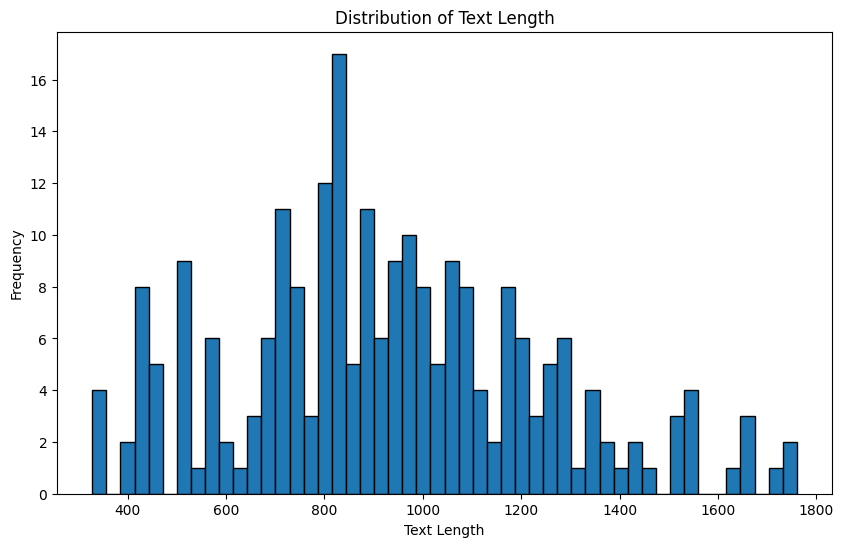

In [ ]:
# EDA

# Create a new column for text length
df['text_length'] = df['combined_text'].apply(len)

# Plot the distribution of text lengths
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df['text_length'].plot(kind='hist', bins=50, edgecolor='black')
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.show()

1    46
0    42
2    39
3    37
4    35
5    20
6     7
7     2
Name: label_count, dtype: int64


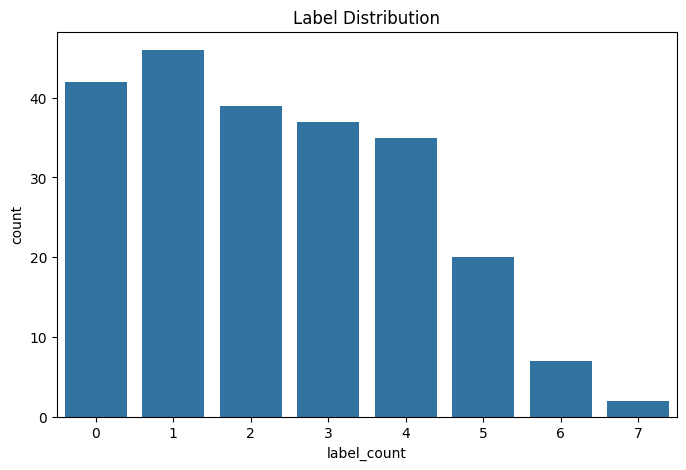

In [ ]:
import seaborn as sns

print(df['label_count'].value_counts())
# Plot the label distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='label_count', data=df)
plt.title('Label Distribution')
plt.show()

Shape of X: (228, 1425)
Shape of y: (228,)
Accuracy: 0.7391304347826086


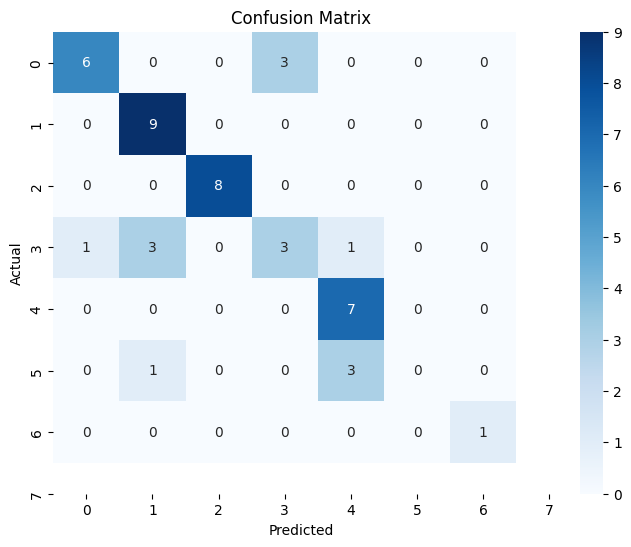

Precision: 0.6826000086869651
Recall: 0.7391304347826086
F1 Score: 0.6953620051446138
Specificity for each class: [0.972972972972973, 0.8918918918918919, 1.0, 0.9210526315789473, 0.8974358974358975, 1.0, 1.0]
Class 0:
True Positive: 6
True Negative: 36
False Positive: 1
False Negative: 3

Class 1:
True Positive: 9
True Negative: 33
False Positive: 4
False Negative: 0

Class 2:
True Positive: 8
True Negative: 38
False Positive: 0
False Negative: 0

Class 3:
True Positive: 3
True Negative: 35
False Positive: 3
False Negative: 5

Class 4:
True Positive: 7
True Negative: 35
False Positive: 4
False Negative: 0

Class 5:
True Positive: 0
True Negative: 42
False Positive: 0
False Negative: 4

Class 6:
True Positive: 1
True Negative: 45
False Positive: 0
False Negative: 0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


IndexError: index 7 is out of bounds for axis 0 with size 7

In [ ]:
## MODEL BUILDING
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt



# X_no = filtered_text_features_df[df['status'] != 0]
# Features (TF-IDF values above threshold)
X = text_features_df.values  # Use the filtered text features

# Labels (excluding label 0)
y = df['label_count'].values

# Print the shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


from sklearn.model_selection import StratifiedShuffleSplit

# Assuming X and y are your feature and target arrays
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=6)

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


# Initialize and train a RF model
model = RandomForestClassifier(random_state=6)
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
num_classes = len(cm)
specificity = []
for class_index in range(num_classes):
            true_negatives = np.sum(np.delete(np.delete(cm, class_index, axis=0), class_index, axis=1))
            false_positives = np.sum(cm[:, class_index]) - cm[class_index, class_index]
            specificity.append(true_negatives / (true_negatives + false_positives))

print("Specificity for each class:", specificity)

# Print TP, TN, FP, FN for each class
for i in range(len(model.classes_)):
    true_positive = cm[i, i]
    false_positive = cm[:, i].sum() - true_positive
    false_negative = cm[i, :].sum() - true_positive
    true_negative = cm.sum() - (true_positive + false_positive + false_negative)

    print(f"Class {model.classes_[i]}:")
    print(f"True Positive: {true_positive}")
    print(f"True Negative: {true_negative}")
    print(f"False Positive: {false_positive}")
    print(f"False Negative: {false_negative}")
    print()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_squared_error
import numpy as np
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error (MSE): 1.4782608695652173
Root Mean Squared Error (RMSE): 1.2158375177486576


In [ ]:
# Trying Random States

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# Number of random states to try
num_random_states = 32
# Array to store accuracy scores
accuracy_scores = []

for random_state in range(num_random_states):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    # Initialize and train a logistic regression model
    model = RandomForestClassifier(random_state = 6)
    model.fit(X_train, y_train)

    # Predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f"Accuracy for Random State {random_state}: {accuracy}")

# Calculate and print the average accuracy
average_accuracy = np.mean(accuracy_scores)
print(f"\nAverage Accuracy over {num_random_states} random states: {average_accuracy}")



Accuracy for Random State 0: 0.7608695652173914
Accuracy for Random State 1: 0.8043478260869565
Accuracy for Random State 2: 0.8260869565217391
Accuracy for Random State 3: 0.7608695652173914
Accuracy for Random State 4: 0.8913043478260869
Accuracy for Random State 5: 0.782608695652174
Accuracy for Random State 6: 0.8260869565217391
Accuracy for Random State 7: 0.8043478260869565
Accuracy for Random State 8: 0.8478260869565217
Accuracy for Random State 9: 0.8043478260869565
Accuracy for Random State 10: 0.782608695652174
Accuracy for Random State 11: 0.7608695652173914
Accuracy for Random State 12: 0.7608695652173914
Accuracy for Random State 13: 0.8478260869565217
Accuracy for Random State 14: 0.7391304347826086
Accuracy for Random State 15: 0.8695652173913043
Accuracy for Random State 16: 0.7391304347826086
Accuracy for Random State 17: 0.8043478260869565
Accuracy for Random State 18: 0.6739130434782609
Accuracy for Random State 19: 0.8043478260869565
Accuracy for Random State 20: 0.

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
 #Assuming X and y are your feature and target arrays
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

# Define the model
model = RandomForestClassifier()

# Define the number of splits for cross-validation
n_splits = 5  # Adjust as needed

# Create a StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=6)

# Perform cross-validation
cross_val_results = cross_val_score(model, X_train, y_train, cv=stratified_kfold, scoring='accuracy')

# Display the cross-validation results
print(f'Cross-Validation Accuracy: {cross_val_results.mean():.4f} +/- {cross_val_results.std():.4f}')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy: 0.7480 +/- 0.0734
